In [1]:
import pandas as pd

df = pd.read_csv('dataset.csv', index_col=0)

df = df.dropna(subset=['PDA'])

def hspda(s):
    if (s['PDA'] > 1.5 ) or (s['LA/AO'] > 1.5):
        return 'y'
    else:
        return 'n'

df['hsPDA'] = df.apply(hspda, axis=1)
df['severe_ivh'] = df['ivh_grade'].apply(lambda x: 'y' if x > 2 else 'n')

df['ProMielo_avg'] = df['ProMielo_avg'].fillna(0)
df['Mielo_avg'] = df['Mielo_avg'].fillna(0)
df['Metamielo_avg'] = df['Metamielo_avg'].fillna(0)

df['sex'] = df['sex'].replace('femenino', 'feminino').replace('maculino', 'masculino').replace('Masculino', 'masculino').replace('femininno', 'feminino').replace('Feminino', 'feminino').replace('feminina', 'feminino').replace('faminino', 'feminino')
df['twin'] = df['twin'].replace('Gemelar', 'twin').replace('gemelar', 'twin').replace('GEMELAR', 'twin')
df['AIG'] = df['AIG'].replace('pig', 'PIG').replace('Pig', 'PIG').replace('GIG', 'AIG')

df['Metamielo_max'] = df['Metamielo_max'].fillna(0)
df['Metamielo_min'] = df['Metamielo_min'].fillna(0)
df['Mielo_max'] = df['Mielo_max'].fillna(0)
df['Mielo_min'] = df['Mielo_min'].fillna(0)
df['Metamielo_max'] = df['Metamielo_max'].fillna(0)
df['Metamielo_min'] = df['Metamielo_min'].fillna(0)
df['ProMielo_max'] = df['ProMielo_max'].fillna(0)
df['ProMielo_min'] = df['ProMielo_min'].fillna(0)
df['Bast_avg'] = df['Bast_avg'].fillna(0)
df['Bast_max'] = df['Bast_max'].fillna(0)
df['Bast_min'] = df['Bast_min'].fillna(0)

df['IN'] = (df['ProMielo_avg'] + df['Mielo_avg'] + df['Metamielo_avg'] + df['Bast_avg'])/df['Neutro_avg']
df['NLR'] = df['Neutro_avg']/df['Linfo_avg']
df['PLR'] = df['Plaq_avg']/df['Linfo_avg']
df['LMR'] = df['Linfo_avg']/df['Mono_avg']

df = df.iloc[1:]

df = df.drop(['rghc', 'RGHC_x', 'RGHC_y', 'DNASC_y', 'Ur_avg', 'Creat_avg', 'Creat_max', 'Creat_min', 'Ur_max', 'Ur_min', 'P_avg', 'P_max', 'P_min'], axis=1)

In [2]:
# < 28 weeks
df = df[df['hsPDA'] == 'y']
df = df[df['GA'] < 28]
df = df.drop(['PDA', 'LA/AO', 'hsPDA'], axis=1)

# All
#df = df[df['hsPDA'] == 'y']
#df = df.drop(['PDA', 'LA/AO', 'hsPDA'], axis=1)

In [3]:
df

,AIG,BW,APGAR_5,sex,twin,GA,outcome,ivh_grade,pH_avg,pCO2_avg,...,CaT_max,Cai_max,BT_max,BD_max,BI_max,severe_ivh,IN,NLR,PLR,LMR
5,AIG,1020.0,9.0,masculino,twin,26.43,Death,NaN,7.29,40.85,...,6.4,4.66,6.00,0.25,5.75,n,0.097087,1.775862,5.293103,2.148148
6,PIG,630.0,6.0,masculino,twin,26.43,Death,3.0,7.27,49.80,...,7.8,4.68,NaN,NaN,NaN,y,0.163696,1.941384,2.524718,1.818882
16,AIG,580.0,6.0,feminino,single,25.57,Death,NaN,7.15,38.28,...,7.8,4.98,4.80,1.04,3.76,n,0.333333,3.615385,5.897436,2.166667
17,AIG,680.0,8.0,feminino,twin,25.57,Survived,0.0,7.23,42.50,...,5.8,4.86,5.62,0.43,5.19,n,0.137500,0.833333,2.250000,5.333333
21,PIG,400.0,6.0,feminino,single,25.00,Death,0.0,7.17,39.98,...,8.6,5.56,4.17,0.42,3.75,n,0.011251,0.486159,1.201724,6.958478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,AIG,780.0,5.0,feminino,single,26.43,Death,NaN,7.12,49.44,...,9.3,5.08,NaN,NaN,NaN,n,0.145299,1.945549,4.868927,3.681873
601,AIG,580.0,2.0,masculino,single,23.29,Survived,3.0,7.12,55.60,...,4.7,5.00,6.65,0.73,5.92,y,0.196970,0.578947,1.921053,8.769231
602,AIG,540.0,3.0,feminino,twin,23.29,Death,NaN,7.18,36.32,...,4.8,5.32,10.37,1.13,9.75,n,0.288591,4.806452,9.000000,1.937500
604,AIG,800.0,7.0,masculino,single,23.29,Death,2.0,7.26,48.20,...,6.3,5.87,8.29,0.46,7.83,n,0.068627,1.186047,3.069767,8.600000


In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['severe_ivh'] = encoder.fit_transform(df['severe_ivh'])
df['AIG'] = encoder.fit_transform(df['AIG'])
df['sex'] = encoder.fit_transform(df['sex'])
df['twin'] = encoder.fit_transform(df['twin'])
df['outcome'] = encoder.fit_transform(df['outcome'])

from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(missing_values=np.nan, strategy='mean')

idf = np.round(pd.DataFrame(imp.fit_transform(df)),2)
idf.columns = df.columns
idf.index = df.index

# Drop outcomes / More drops - feature selection
dropped = idf[['outcome', 'ivh_grade', 'severe_ivh', 'AIG', 'twin', 'sex', 'BW', 'GA']]
idf = idf.drop(['outcome', 'ivh_grade', 'severe_ivh', 'AIG', 'twin', 'sex', 'BW', 'GA'], axis=1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(idf))
scaled_df.columns = idf.columns

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
pca.fit_transform(scaled_df)
pca.explained_variance_ratio_.cumsum()

array([0.14978521, 0.26883467, 0.35057437, 0.41871206, 0.47659673,
       0.53227673, 0.57218686, 0.60805504, 0.64266072, 0.67542834,
       0.70526343, 0.72976877, 0.75205667, 0.77396096, 0.79317932,
       0.80982512, 0.8253892 , 0.8402155 , 0.8536446 , 0.86510163,
       0.87576065, 0.88561383, 0.89466049, 0.90330273, 0.91104094,
       0.91783249, 0.92456778, 0.93091438, 0.93613316, 0.94088835,
       0.94542699, 0.94960612, 0.95347511, 0.95715147, 0.96050481,
       0.96364717, 0.96640619, 0.96908612, 0.97160887, 0.97403647])

In [7]:
pca = PCA(n_components=15)
pcs = pca.fit_transform(scaled_df)

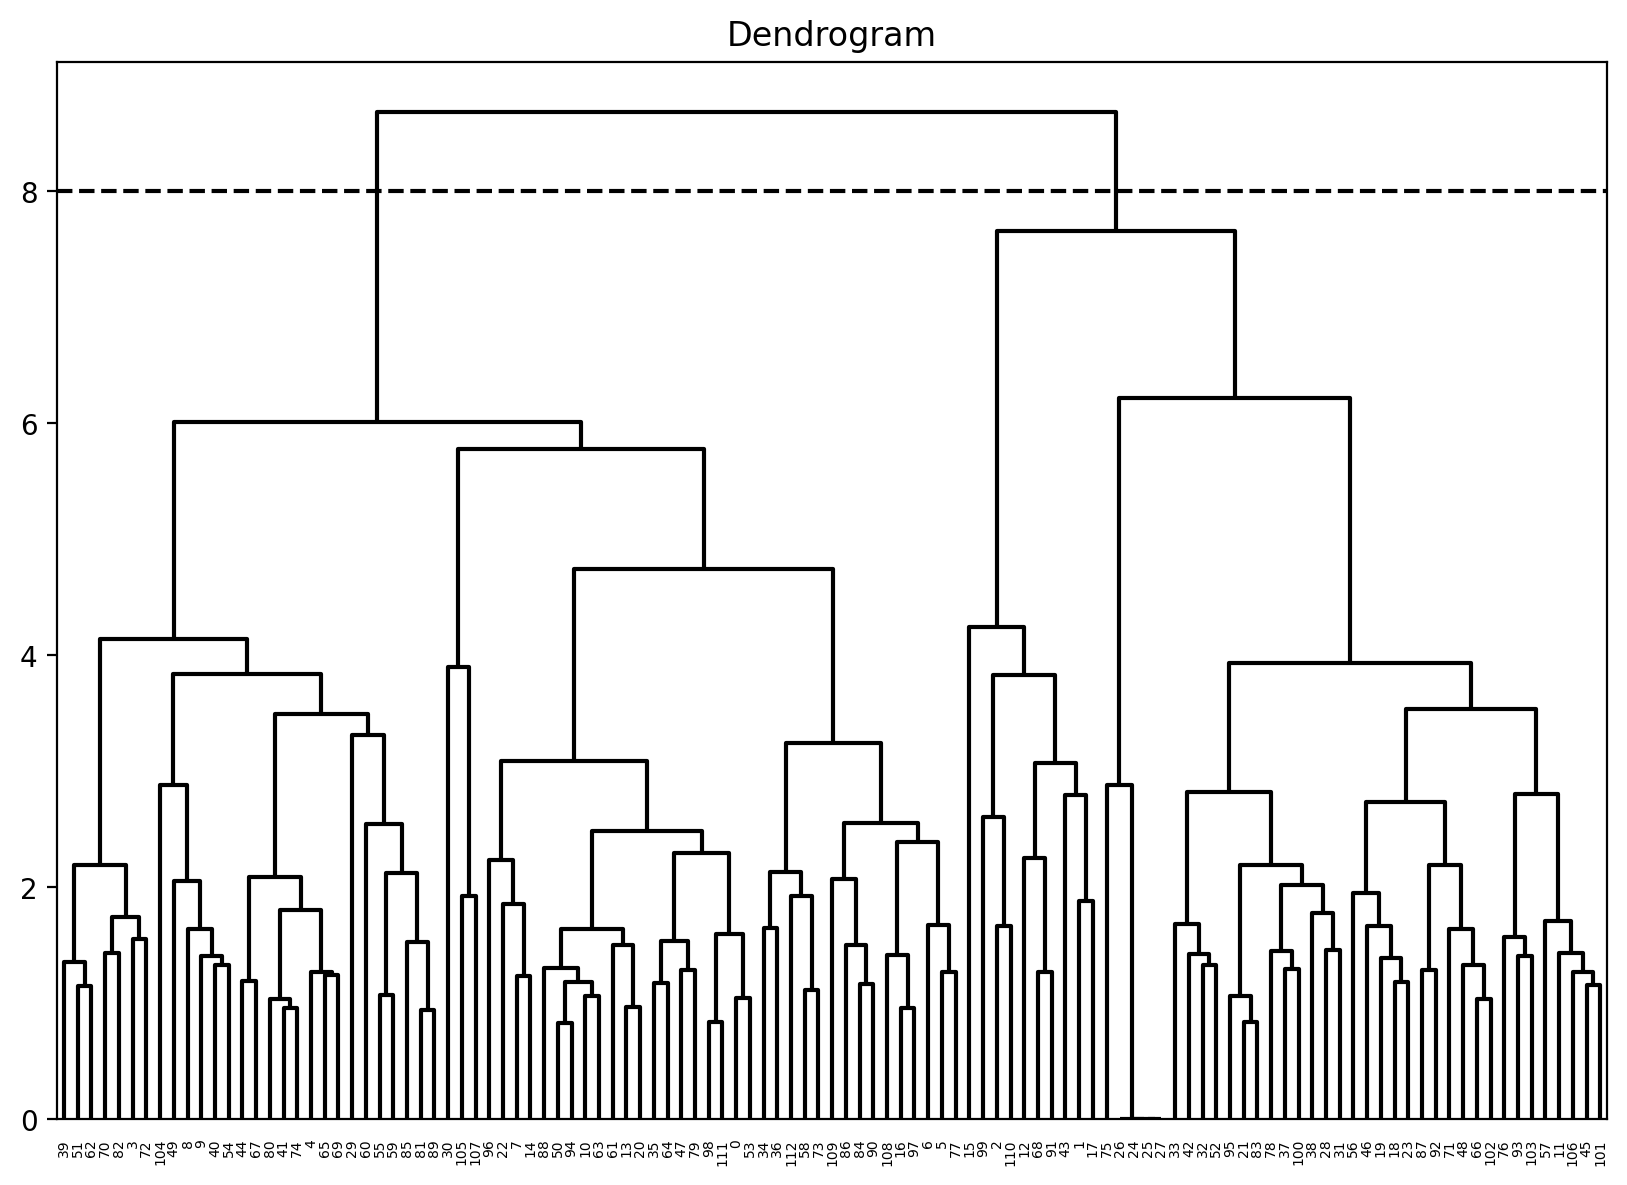

In [43]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7), dpi=200)
plt.title('Dendrogram')

clusters = shc.linkage(pcs,
    method='ward',
    metric='euclidean'
)

shc.dendrogram(Z=clusters, color_threshold=0, above_threshold_color='k')
plt.axhline(y=8, color='black', linestyle='--')

In [9]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(
    n_clusters=2,
    affinity='euclidean',
    linkage='ward'
)

clustering_model.fit(scaled_df)
clustering_model.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1])

In [10]:
idf['cluster'] = list(clustering_model.labels_)
new_df = pd.merge(idf, dropped, how='left', left_index=True, right_index=True)
new_df

,APGAR_5,pH_avg,pCO2_avg,ctCO2_avg,BIC_avg,BE_avg,Glic_avg,Lactato_avg,Hb_avg,Ht_avg,...,LMR,cluster,outcome,ivh_grade,severe_ivh,AIG,twin,sex,BW,GA
5,9.0,7.29,40.85,20.05,22.00,-7.20,54.00,34.00,12.55,37.80,...,2.15,1,0.0,0.83,0.0,0.0,1.0,1.0,1020.0,26.43
6,6.0,7.27,49.80,23.95,22.45,-4.40,33.00,22.00,10.32,31.10,...,1.82,1,0.0,3.00,1.0,1.0,1.0,1.0,630.0,26.43
16,6.0,7.15,38.28,14.32,13.14,-14.62,99.40,69.00,11.35,35.50,...,2.17,0,0.0,0.83,0.0,0.0,0.0,0.0,580.0,25.57
17,8.0,7.23,42.50,18.30,17.00,-9.65,58.00,47.00,9.35,31.65,...,5.33,1,1.0,0.00,0.0,0.0,1.0,0.0,680.0,25.57
21,6.0,7.17,39.98,15.08,13.88,-13.75,112.25,77.00,12.27,39.90,...,6.96,1,0.0,0.00,0.0,1.0,0.0,0.0,400.0,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,5.0,7.12,49.44,16.48,14.98,-13.76,123.33,31.33,11.23,34.87,...,3.68,1,0.0,0.83,0.0,0.0,0.0,0.0,780.0,26.43
601,2.0,7.12,55.60,18.78,17.08,-12.44,54.50,35.25,12.70,41.05,...,8.77,1,1.0,3.00,1.0,0.0,0.0,1.0,580.0,23.29
602,3.0,7.18,36.32,14.26,13.18,-14.32,90.60,23.60,15.05,47.05,...,1.94,0,0.0,0.83,0.0,0.0,1.0,0.0,540.0,23.29
604,7.0,7.26,48.20,22.30,20.85,-5.80,96.50,25.25,12.95,36.00,...,8.60,1,0.0,2.00,0.0,0.0,0.0,1.0,800.0,23.29


In [25]:
new_df = new_df.rename(columns={'pH_avg':'pH', 'pCO2_avg':'pCO2', 'BIC_avg':'HCO3', 'Leuco_avg':'Leukocytes', 'Neutro_avg':'Neutrophils'})

In [30]:
new_df['cluster'] = new_df['cluster'].replace(1, 2).replace(0, 1)

Text(0, 0.5, 'HCO3')

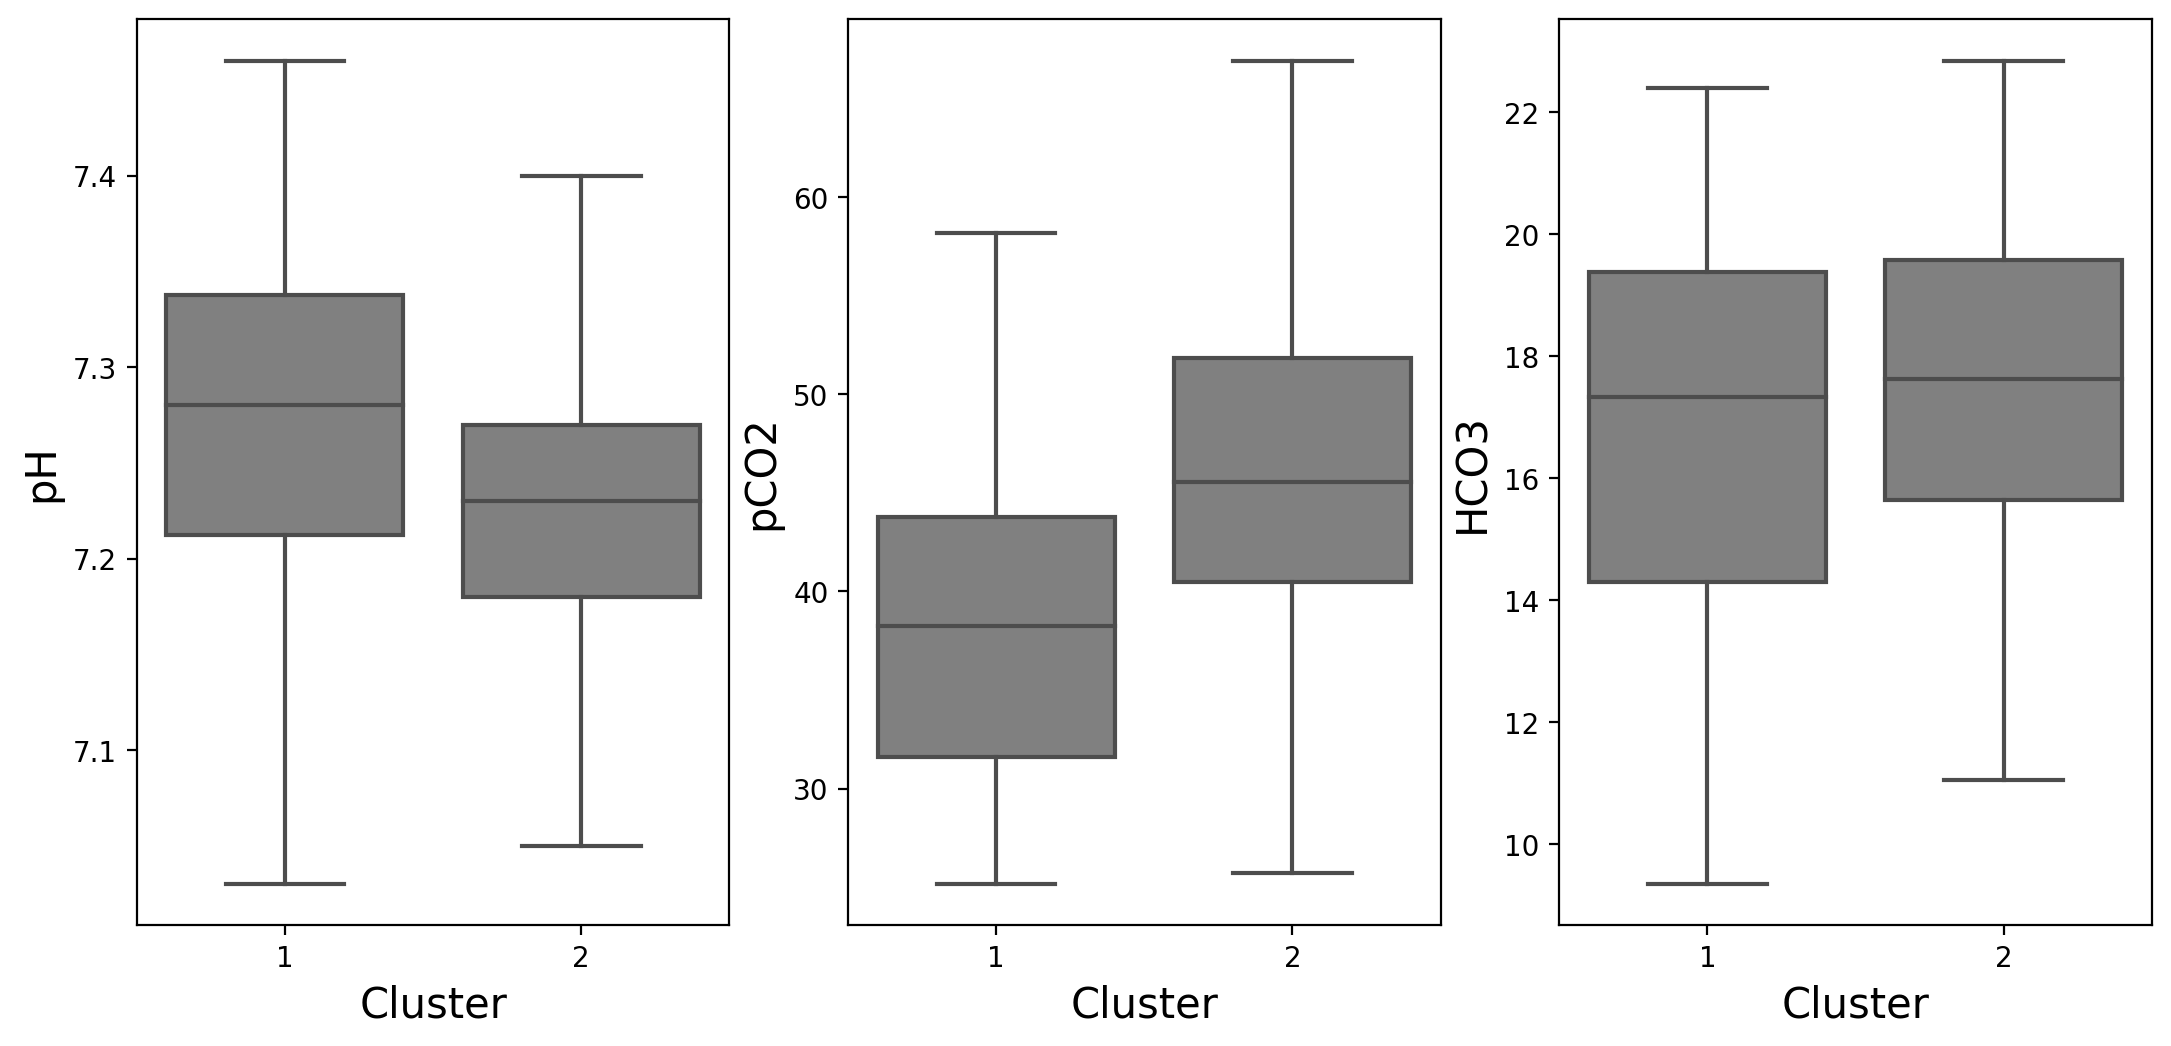

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, figsize=(13,6), dpi=200)
sns.boxplot(data=new_df, x='cluster', y='pH', showfliers=False, ax=axs[0], color='gray')
axs[0].set_xlabel("Cluster", fontsize=15)
axs[0].set_ylabel("pH", fontsize=15)
sns.boxplot(data=new_df, x='cluster', y='pCO2', showfliers=False, ax=axs[1], color='gray')
axs[1].set_xlabel("Cluster", fontsize=15)
axs[1].set_ylabel("pCO2", fontsize=15)
sns.boxplot(data=new_df, x='cluster', y='HCO3', showfliers=False, ax=axs[2], color='gray')
axs[2].set_xlabel("Cluster", fontsize=15)
axs[2].set_ylabel("HCO3", fontsize=15)

Text(0, 0.5, 'NLR')

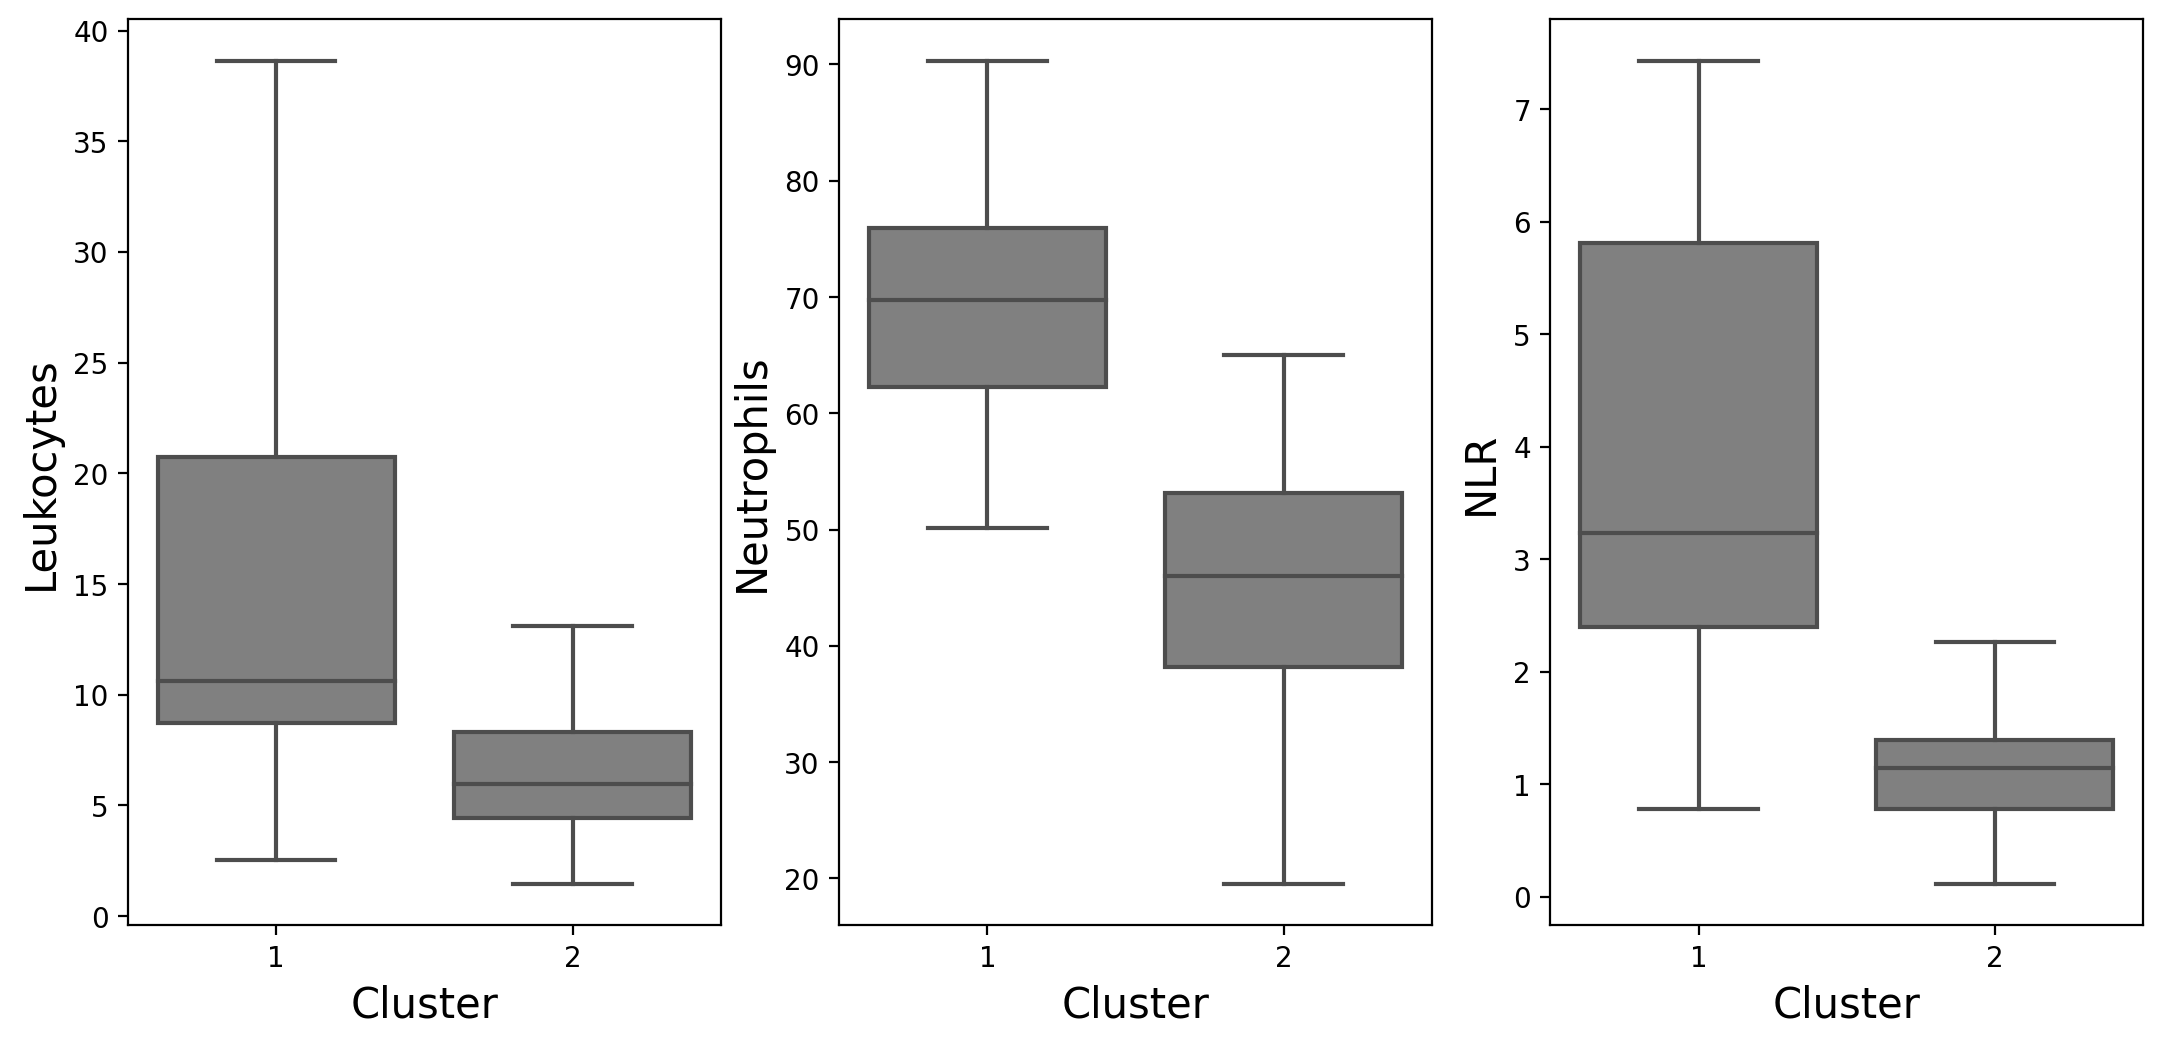

In [42]:
fig, axs = plt.subplots(ncols=3, figsize=(13, 6), dpi=200)

sns.boxplot(data=new_df, x='cluster', y='Leukocytes', showfliers=False, ax=axs[0], color='gray')
axs[0].set_xlabel("Cluster", fontsize=15)
axs[0].set_ylabel("Leukocytes", fontsize=15)
sns.boxplot(data=new_df, x='cluster', y='Neutrophils', showfliers=False, ax=axs[1], color='gray')
axs[1].set_xlabel("Cluster", fontsize=15)
axs[1].set_ylabel("Neutrophils", fontsize=15)
sns.boxplot(data=new_df, x='cluster', y='NLR', showfliers=False, ax=axs[2], color='gray')
axs[2].set_xlabel("Cluster", fontsize=15)
axs[2].set_ylabel("NLR", fontsize=15)

In [61]:
new_df.to_csv('analysis.csv')